# Wahrscheinlichkeitsverteilungen Übersicht

## Inhaltsverzeichnis

- **diskrete Verteilungen:**
    - [Diskrete Gleichverteilung](#diskrete-gleichverteilung)
    - [Bernoulliverteilung](#bernoulliverteilung)
    - [Binomialverteilung](#binomialverteilung)
    - [Poissonverteilung](#poissonverteilung)
    - [Negative Binomialverteilung](#negative-binomialverteilung)
    - [Geometrische Verteilung](#geometrische-verteilung)
    - [Hypergeometrische Verteilung](#hypergeometrische-verteilung)
- **kontinuierliche Verteilungen:**
    - [Kontinuierliche Gleichverteilung](#kontinuierliche-gleichverteilung)
    - [Gammaverteilung](#gammaverteilung)
    - [Betaverteilung](#betaverteilung)
    - [Exponentialverteilung](#exponentialverteilung)
    - [Normalverteilung](#normalverteilung)



## Diskrete Verteilungen 

### Diskrete Gleichverteilung <a class="anchor" id="diskrete-gleichverteilung"></a>

**Wahrscheinlichkeitsfunktion (probabillity mass function):**

*algemein:* $ P(X^{-1}(x))=P(X=x)=f(x)$

$f(x) = \left\{
\begin{array}{ll}
\frac{1}{n}&, \ \textrm{für}\ 0 < x \le n \\
0 &, \ \textrm{sonst} \\
\end{array}
\right.\\ \textrm{mit} \ n = b - a \ , \ \textrm{für} \ b > a$


**Verteilungsfunktion (cumulative distribution function):**

$P(X \le x)=F_{X}(x)= \sum_{i = 1}^{x}\frac{i}{n} $


**Erwartungswert:**

$E(X) = \frac{1}{n}\sum_{i=1}^{n} x_{i}$



**Varianz:**

*allgemein:* $Var(X) = E(X^{2})-(E(X))^{2}$

$Var(X)= \frac{1}{n}\sum_{i=1}^{n}(x_{i} - E(X))^2$



**Standardabweichung:**

*allgemein:* $\sigma = \sqrt{Var(X)}$

$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_{i} - E(X))^2}$

In [80]:
from scipy.stats import randint
import numpy as np

a = 1
b = 7

rand = randint(a, b)

In [81]:
x = np.arange(0, b, 0.01)
pmf = np.array(rand.pmf(x))
cdf = np.array(rand.cdf(x))

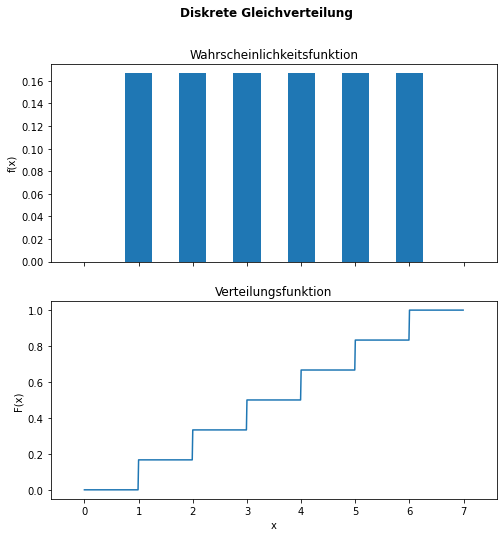

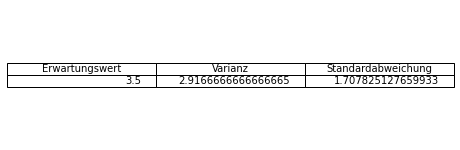

In [93]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, sharex=True, figsize=(8,8))
fig.suptitle('Diskrete Gleichverteilung', weight='bold')
axs[0].set_title("Wahrscheinlichkeitsfunktion")
axs[0].bar(x, pmf, width=0.5)
axs[0].set_ylabel('f(x)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('F(x)')
axs[1].set_title("Verteilungsfunktion")
axs[1].plot(x, cdf)

fig, ax =plt.subplots(1, 1, figsize=(8,2.5))
data= [[rand.expect(),
      rand.var(),
      rand.std()]]
column_labels=["Erwartungswert", "Varianz", "Standardabweichung"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

### Bernoulliverteilung <a class="anchor" id="bernoulliverteilung"></a>

Durchführung eines Bernoulli-Experiments, welches die zwei Ergebnisse Misserfolg (0) bzw. Erfolg (1) besitzt

**Wahrscheinlichkeitsfunktion:**

$f (x) = \left\{
\begin{array}{ll}
p^{x}\cdot(1-p)^{(1-x)}&, \ x = 0, \ 1 \\
0 &, \ \textrm{sonst} \\
\end{array}
\right. $

In [5]:
from scipy.stats import bernoulli

p = 0.6
b  = bernoulli(p)

In [6]:
b.pmf(0), b.pmf(1)

(0.4, 0.6)

In [7]:
x = np.arange(-0.5, 2, 0.5)
pmf = np.array(b.pmf(x))

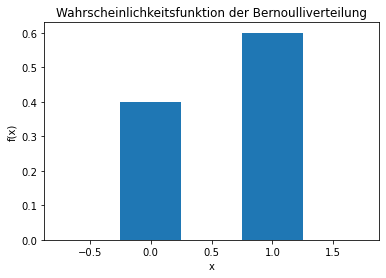

In [8]:
plt.bar(x, pmf, width=0.5)
plt.title("Wahrscheinlichkeitsfunktion der Bernoulliverteilung")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

**Erwartungswert:**

$E(X) = p$

In [9]:
b.expect()

0.6

**Varianz:**

$Var(X)=p\cdot(1-p)$

In [10]:
b.var()

0.24

**Standardabweichung:**

$\sigma = \sqrt{p\cdot(1-p)}$

In [11]:
b.std()

0.4898979485566356

**Verteilungsfunktion:**

$F_{X}(x) = \left\{
\begin{array}{ll}
0 &, \ x < 0 \\
1-p &, \ 0 \le x \le 1 \\
1 &, \ x \ge 1 \\
\end{array}
\right. $

In [12]:
x = np.arange(-0.5, 2, 0.01)
cdf = np.array(b.cdf(x))

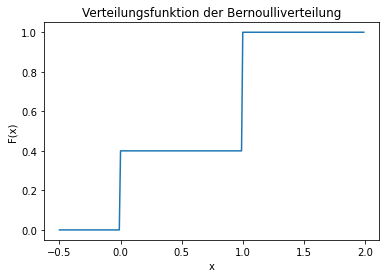

In [13]:
plt.plot(x, cdf)
plt.title("Verteilungsfunktion der Bernoulliverteilung")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### Binomialverteilung <a class="anchor" id="binomialverteilung"></a>

Durchführung von *n-mal* unabhängigen *Bernoulli-Experimenten*

**Wahrscheinlichkeitsfunktion:**

$f_{p, \ n}(k)= \left\{
\begin{array}{ll}
\binom{n}{k} \cdot p^{k} \cdot (1-p)^{n-k}  &, \  0 \le k \le n\\
0 &, \ \textrm{sonst} \\
\end{array}
\right. $

In [14]:
from scipy.stats import binom

n = 10
p = 0.5

k = np.arange(0, n+1)
bino = binom(n, p)
pmf = np.array(bino.pmf(k))

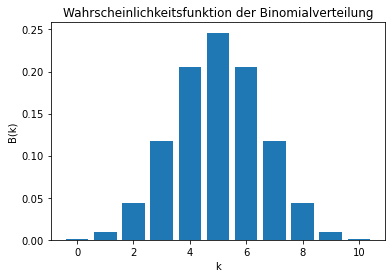

In [15]:
plt.bar(k, pmf)
plt.title("Wahrscheinlichkeitsfunktion der Binomialverteilung")
plt.xlabel("k")
plt.ylabel("B(k)")
plt.show()

**Erwartungswert:**

$E(X) = n \cdot p$

In [16]:
bino.expect()

5.000000000000005

**Varianz:**

$Var(X) = n \cdot p \cdot (1-p)$

In [17]:
bino.var()

2.5

**Standardabweichung:**

$\sigma = \frac{\sqrt{n}}{2}$

In [18]:
bino.std()

1.5811388300841898

**Verteilungsfunktion:**

$F_{X}(x)= \sum_{k=0}^{|x|} \binom{n}{k} \cdot p^{k} \cdot (1-p)^{n-k}$

In [19]:
k = np.arange(0, n, 0.01)
cdf = np.array(bino.cdf(k))

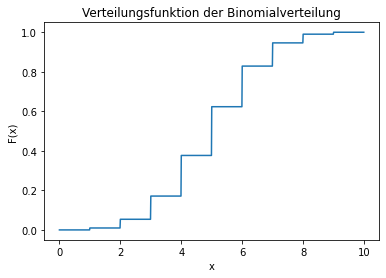

In [20]:
plt.plot(k, cdf)
plt.title("Verteilungsfunktion der Binomialverteilung")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### Poissonverteilung <a class="anchor" id="poissonverteilung"></a>

Grenzverteilung $(n \rightarrow \infty)$ der Bernoulliverteilung

**Wahrscheinlichkeitsfunktion:**

$f_{\lambda}(k)=\frac{\lambda^{k}}{k!}e^{-\lambda}$ mit $\lambda = n \cdot p_{n}$

In [21]:
from scipy.stats import poisson

lam = 5
n = 12

k = np.arange(0, n+1)
poi = poisson(lam)
pmf = np.array(poi.pmf(k))

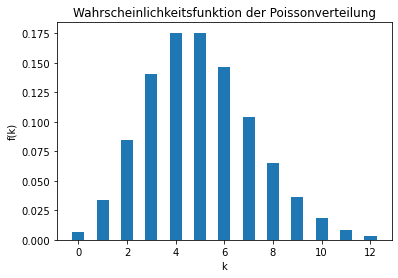

In [22]:
plt.bar(k, pmf, width=0.5)
plt.title("Wahrscheinlichkeitsfunktion der Poissonverteilung")
plt.xlabel("k")
plt.ylabel("f(k)")
plt.show()

**Erwartungswert:**

$E(X)=\lambda$

In [23]:
poi.expect()

4.9999999999999964

**Varianz:**

$Var(X)=\lambda$

In [24]:
poi.var()

5.0

**Standartabweichung:**

$\sigma = \sqrt{\lambda}$

In [25]:
poi.std()

2.23606797749979

**Verteilungsfunktion:**

$F_{\lambda}(n)=\sum_{k=0}^{n}f_{\lambda}(k) = p_{n}$

In [26]:
k = np.arange(0, n, 0.01)
cdf = np.array(poi.cdf(k))

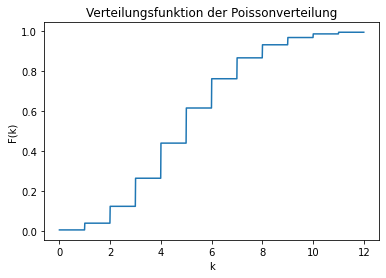

In [27]:
plt.plot(k, cdf)
plt.title("Verteilungsfunktion der Poissonverteilung")
plt.xlabel("k")
plt.ylabel("F(k)")
plt.show()

### Negative Binomialverteilung <a class="anchor" id="negative-binomialverteilung"></a>

Gibt die Wartezeit bis zum *r-ten* Erfolg im *Binomialmodel*(Wiederholung von unabhängigen *Bernouli-Experimenten*) an

**Wahrscheinlichkeitsfunktion:**

$f_{r,\ p}(k) = \binom{r+k-1}{k} \cdot p^{r} \cdot (1-p)^{k}$

In [28]:
from  scipy.stats import nbinom

n = 5
r = 0.4
p = 0.4

k = np.arange(0, n+1)
nbino = nbinom(r, p)
pmf = np.array(nbino.pmf(k))

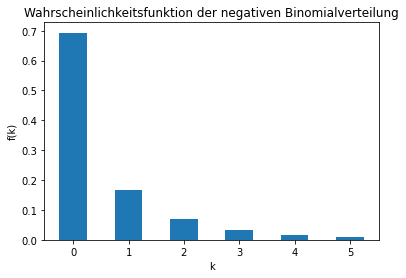

In [29]:
plt.bar(k, pmf, width=0.5)
plt.title("Wahrscheinlichkeitsfunktion der negativen Binomialverteilung")
plt.xlabel("k")
plt.ylabel("f(k)")
plt.show()

**Erwartungswert:**

$E(X)=\frac{r \ \cdot \ (1-p)}{p}$

In [30]:
nbino.expect()

0.6

**Varianz:**

$Var(X)=\frac{r \ \cdot \ (1-p)}{p^{2}}$

In [31]:
nbino.var()

1.5000000000000002

**Standardabweichung:**

$\sigma=\frac{\sqrt{r \ \cdot \ (1-p)}}{p}$

In [32]:
nbino.std()

1.2247448713915892

**Verteilungsfunktion:**

$F_{r, \ p}(k) = \sum_{k = 0}^{\infty}\binom{-r}{k} \cdot p^{r} \cdot (1-p)^{k}$

In [33]:
k = np.arange(0, n, 0.01)
cdf = np.array(nbino.cdf(k))

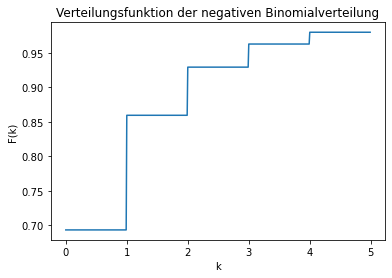

In [34]:
plt.plot(k, cdf)
plt.title("Verteilungsfunktion der negativen Binomialverteilung")
plt.xlabel("k")
plt.ylabel("F(k)")
plt.show()

### Geometrische Verteilung <a class="anchor" id="geometrische-verteilung"></a>

Spezialfall der *negativen Binomialverteilung*: Gibt Wartezeit bis zum *ersten* Erfolg im *Binomialmodel* an

**Wahrscheinlichkeitsfunktion:**

$f_{1,\ p}(k)=f_{p}(k)= p \cdot (1-p)^{k}$

In [35]:
from scipy.stats import geom

p = 0.5
n = 6

k = np.arange(1, n+1)
geo = geom(p)
pmf = np.array(geo.pmf(k))

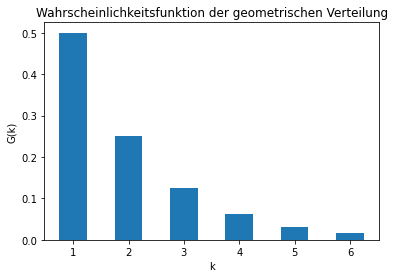

In [36]:
plt.bar(k, pmf, width=0.5)
plt.title("Wahrscheinlichkeitsfunktion der geometrischen Verteilung")
plt.xlabel("k")
plt.ylabel("G(k)")
plt.show()

**Erwartungswert:**

$E(X)= \frac{1}{p}$

In [37]:
geo.expect()

2.0

**Varianz:**

$Var(X) = \frac{1-p}{p^{2}}$

In [38]:
geo.var()

2.0

**Standardabweichung:**

$\sigma = \frac{\sqrt{1-p}}{p}$

In [39]:
geo.std()

1.4142135623730951

**Verteilungsfunktion:**

$F_{p}(k) = \sum_{i=1}^{k}p \cdot (1-p)^{i-1} = 1-(1-p)^{k}$

In [40]:
k = np.arange(1, n, 0.01)
cdf = np.array(geo.cdf(k))

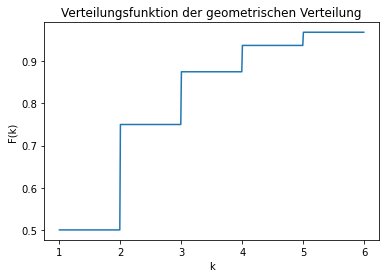

In [41]:
plt.plot(k, cdf)
plt.title("Verteilungsfunktion der geometrischen Verteilung")
plt.xlabel("k")
plt.ylabel("F(k)")
plt.show()

### Hypergeometrische Verteilung <a class="anchor" id="hypergeometrische-verteilung"></a>

Durchführung einer Stichprobe von *n* Elementen, durch ziehen ohne Zurücklegen gibt Auskunft über bestimmte Anzahl *k* von gezogenen Elementen

**Wahrscheinlichkeitsverteilung:**

$h_{M, n, N}(k) = \frac{\binom{n}{k} \binom{M-N}{N-k}}{\binom{M}{N}}$

In [42]:
from scipy.stats import hypergeom

[M, n, N] = [20, 7, 12]

k = np.arange(0, n+1)
hypergeo = hypergeom(M, n, N)
pmf = np.array(hypergeo.pmf(k))

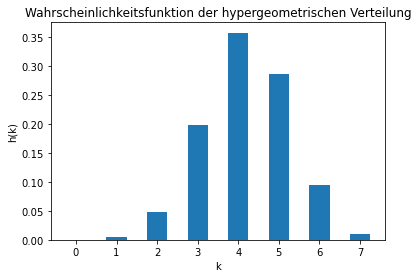

In [43]:
plt.bar(k, pmf, width=0.5)
plt.title("Wahrscheinlichkeitsfunktion der hypergeometrischen Verteilung")
plt.xlabel("k")
plt.ylabel("h(k)")
plt.show()

**Erwartungswert:**

$E(X) = n \cdot \frac{N}{M}$

In [44]:
hypergeo.expect()

4.199999999999995

**Varianz:**

$Var(X) = n \cdot \frac{N}{M}\cdot \frac{(M-N)}{M}\cdot\frac{M-n}{M-1}$

In [45]:
hypergeo.var()

1.1494736842105264

**Verteilungsfunktion:**

$H_{M, n, M}(k) = \sum_{i = 0}^{k} \frac{\binom{n}{i} \binom{M-N}{N-i}}{\binom{M}{N}}$

In [46]:
k = np.arange(0, n, 0.01)
cdf = np.array(hypergeo.cdf(k))

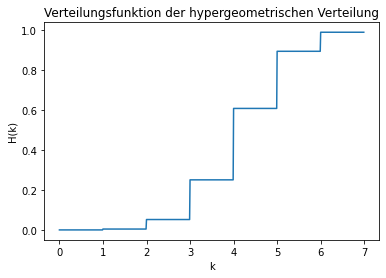

In [47]:
plt.plot(k, cdf)
plt.title("Verteilungsfunktion der hypergeometrischen Verteilung")
plt.xlabel("k")
plt.ylabel("H(k)")
plt.show()

## Kontinuierliche Verteilungen

### Kontinuierliche Gleichverteilung <a class="anchor" id="kontinuierliche-gleichverteilung"></a>

**Dichtefunktion:**

$f(x) = \left\{
\begin{array}{ll}
\frac{1}{b-a} &, \ für \ a \le x \le b\\
0  &, \ \textrm{sonst}\\
\end{array}
\right.$

In [48]:
from scipy.stats import uniform

a = 1
b = 8

x = np.arange(0, b+1, 0.01)
uni = uniform(a, scale= b-a)
pdf = np.array(uni.pdf(x))

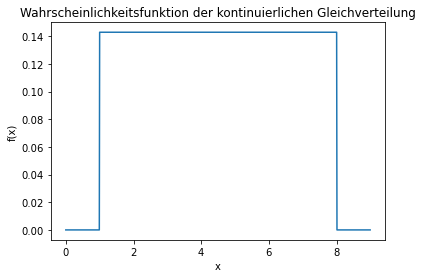

In [49]:
plt.plot(x, pdf)
plt.title("Wahrscheinlichkeitsfunktion der kontinuierlichen Gleichverteilung")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

**Erwartungswert:**

$E(X) = \int_{-\infty}^{\infty}x \cdot f(x) = \frac{a+b}{2}$

In [50]:
uni.expect()

4.5

**Varianz:**

$Var(X)=\frac{1}{12}(b-a)^2$

In [51]:
uni.var()

4.083333333333333

**Standardabweichung:**

$\sigma = \sqrt{\frac{1}{12}(b-a)^2} = \frac{b-a}{2\sqrt{3}}$

In [52]:
uni.std()

2.0207259421636903

**Verteilungsfunktion:**

$F(x) = \left\{
\begin{array}{ll}
0  &, \ \textrm{für} \ x \le a\\
\frac{x-a}{b-a} &, \ für \ a < x < b\\
1  &, \ \textrm{für} \ x \ge b\\
\end{array}
\right.$

In [53]:
cdf = uni.cdf(x)

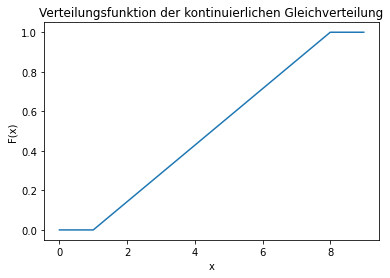

In [54]:
plt.plot(x, cdf)
plt.title("Verteilungsfunktion der kontinuierlichen Gleichverteilung")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### Gammaverteilung <a class="anchor" id="gammaverteilung"></a>

Gibt die Wartezeit auf den *r-ten* Schadensfall an

**Dichtefunktion:**

$f_{\alpha, r}(x) = \left\{
\begin{array}{ll}
\frac{\alpha^{r}}{\Gamma(r)}x^{r-1} e^{-\alpha \cdot r}  &, \ für \ x > 0\\
0 &, \ für \ x \le 0\\
\end{array}
\right. \\ \textrm{mit} \ \Gamma(r) = (r-1)!$

In [55]:
from scipy.stats import gamma

[n, a, r ] = [6, 1, 2]

x = np.arange(0, n, 0.01)
gam = gamma(r, 0, a)
pdf = np.array(gam.pdf(x))

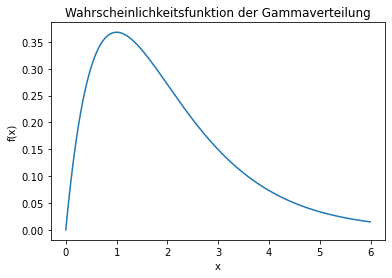

In [56]:
plt.plot(x, pdf)
plt.title("Wahrscheinlichkeitsfunktion der Gammaverteilung")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

**Erwartungswert:**

$E(X) = \frac{r}{\alpha}$

In [57]:
gam.expect()

2.0

**Varianz:**

$Var(X) = \frac{r}{\alpha^{2}}$

In [58]:
gam.var()

2.0

**Standardabweichung:**

$\sigma =\frac{\sqrt{r}}{\alpha}$ 

In [59]:
gam.std()

1.4142135623730951

**Verteilungsfunktion:**

$F_{\alpha, r}(x) =\frac{\alpha^{r}}{\Gamma(r)}\int_{0}^{x}u^{r-1} \cdot e^{-\alpha \cdot u} du$

In [60]:
cdf = gam.cdf(x)

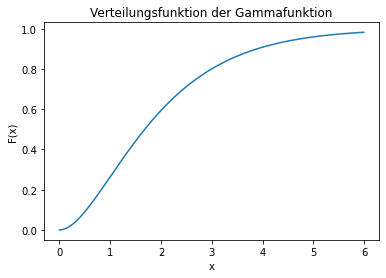

In [61]:
plt.plot(x, cdf)
plt.title("Verteilungsfunktion der Gammafunktion")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### Betaverteilung <a class="anchor" id="betaverteilung"></a>

**Dichtefunktion:**

$f_{r, n}(x) = \frac{1}{B(r,n)}\cdot x^{r-1}\cdot (1-x)^{n-1} \ \textrm{mit} \ B(r,n) = \frac{\Gamma(r)\cdot \Gamma(n)}{\Gamma(r+n)}$

In [62]:
from scipy.stats import beta

[r, n, N] = [2, 10, 1]

x = np.arange(0, N, 0.01)
bet = beta(r, n)
pdf = np.array(bet.pdf(x))

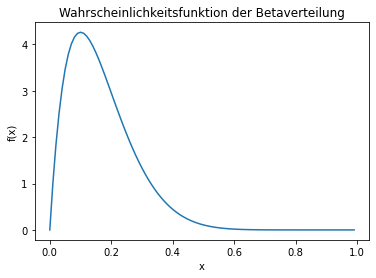

In [63]:
plt.plot(x, pdf)
plt.title("Wahrscheinlichkeitsfunktion der Betaverteilung")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

**Erwartungswert:**

$E(X)=\frac{r}{r+n}$

In [64]:
bet.expect()

0.16666666666666677

**Varianz:**

$Var(X) = \frac{r\cdot n}{(r+n+1)\cdot(r+n)^2}$

In [65]:
bet.var()

0.010683760683760684

**Standardabweichung:**

$\sigma = \sqrt{\frac{r\cdot n}{(r+n+1)\cdot(r+n)^2}}$

In [66]:
bet.std()

0.10336227882434038

**Verteilungsfunktion:**

$F_{r,n}(x) = \left\{
\begin{array}{ll}
0  &, \ für \ x \le 0\\
\frac{1}{B(r, n)}\int_{0}^{x} u^{r-1} \cdot (1-u)^{n-1}du &, \ für \ 0 < x \le 1\\
1  &, \ für \ x > 1\\
\end{array}
\right.$

In [67]:
cdf = np.array(bet.cdf(x))

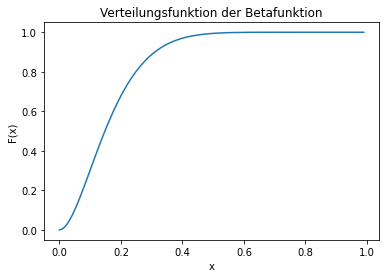

In [68]:
plt.plot(x, cdf)
plt.title("Verteilungsfunktion der Betafunktion")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### Exponentialverteilung <a class="anchor" id="exponentialverteilung"></a>

Spezialfall der *Gammaverteilung*: Gibt die Wartezeit bis zum *ersten* Schadensfall an

**Dichtefunktion (probability density function):**

$f_{\alpha, 1}(x)= f_{\lambda}(x)= \left\{
\begin{array}{ll}
\lambda \cdot e^{- \lambda x} &, \  x \ge 0\\
0 &, \ x \ < \ 0\\
\end{array}
\right. $

In [69]:
from scipy.stats import expon

n = 6
lamb = 1

exp = expon(scale=1/lamb)

x = np.arange(0, n, 0.01)
pdf = np.array(exp.pdf(x))

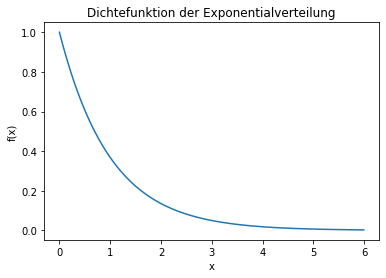

In [70]:
plt.plot(x, pdf)
plt.title("Dichtefunktion der Exponentialverteilung")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

**Erwartungswert:**

$E(X) = \frac{1}{\lambda}$

In [71]:
exp.expect()

0.9999999999999998

**Varianz:**

$Var(X) = \frac{1}{\lambda^{2}}$

In [72]:
exp.var()

1.0

**Standardabweichung:**

$\sigma = \frac{1}{\lambda}$

In [73]:
exp.std()

1.0

**Verteilungsfunktion:**

$F_{\lambda}(x) = \int_{0}^{x}f_{\lambda}(t)dt = \left\{
\begin{array}{ll}
1- e^{- \lambda x} &, \  x \ge 0\\
0 &, \ x  \ < \ 0\\
\end{array}
\right. $

In [74]:
cdf = exp.cdf(x)

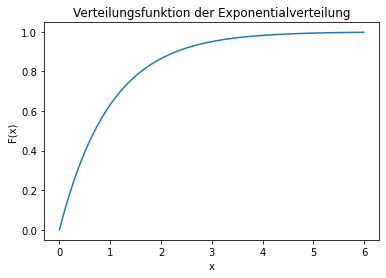

In [75]:
plt.plot(x, cdf)
plt.title("Verteilungsfunktion der Exponentialverteilung")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### Normalverteilung <a class="anchor" id="normalverteilung"></a>

**Dichtefunktion:**

$f_{ \mu,\sigma^{2}}(x)=\frac{1}{\sqrt{2 \pi \cdot \sigma^{2}}} \cdot e^{- \frac{(x - \mu)^{2}}{2 \cdot \sigma^{2}}}$
mit *Erwartungswert:* $-\infty <\mu < \infty$, *Varianz:* $ \sigma^{2} > 0$ und *x:* $-\infty <x < \infty$

In [76]:
from scipy.stats import norm

[mu, var, n] = [4, 1, 8]

x = np.arange(0, n, 0.01)
nor = norm(mu, var)
pdf = np.array(nor.pdf(x))

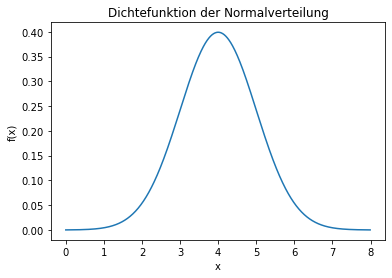

In [77]:
plt.plot(x, pdf)
plt.title("Dichtefunktion der Normalverteilung")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

**Verteilungsfunktion:**

$F_{\mu,\sigma^{2}}(x)=\int_{-\infty}^{x}f_{\mu,\sigma^{2}}(t)dt$

In [78]:
cdf = np.array(nor.cdf(x))

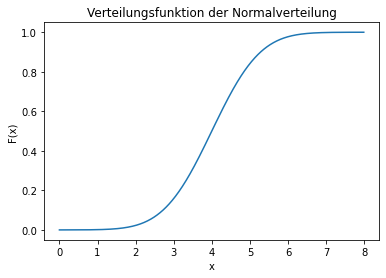

In [79]:
plt.plot(x, cdf)
plt.title("Verteilungsfunktion der Normalverteilung")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()